# Assignment - Convolutional Neural Networks

Develop a CNN model using the CIFAR-100 dataset which has 32x32 images from 100 different classes. 

Try to increase the accuracy of the model to over 0.95. 

To do this, you can change the number of epochs, the number of convolution and dense layers, the kernel size, the number of filters, the padding and stride values.

You can download the dataset with the code from keras.datasets import cifar100.

In [1]:
from keras.datasets import cifar100

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print("Shape of Train Set (X) :", X_train.shape)
print("Shape of Train Set (y) :", y_train.shape)
print("Shape of Test Set (X)   :", X_test.shape)
print("Shape of Test Set (y)   :", y_test.shape)

Shape of Train Set (X) : (50000, 32, 32, 3)
Shape of Train Set (y) : (50000, 1)
Shape of Test Set (X)   : (10000, 32, 32, 3)
Shape of Test Set (y)   : (10000, 1)


Images in the dataset are 32 x 32 pixels in size. 
## Let's look at some sample data.

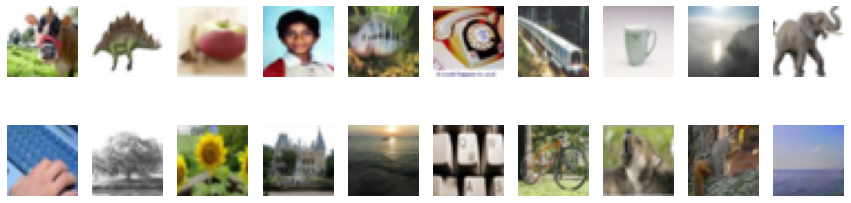

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
           
plt.show()

## Let's convert our target feature into a categorical value.

In [4]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, 100)
y_test_categorical = to_categorical(y_test, 100)

In [5]:
img_row = X_train.shape[1]
img_column = X_train.shape[2]
channel_number = X_train.shape[3]
print(img_row, img_column, channel_number)

32 32 3


## Now we can start creating a Sequential model.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [39]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_row, img_column,channel_number)))
model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_row, img_column,channel_number)))
model.add(Conv2D(filters = 64, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_row, img_column,channel_number)))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32, activation='softmax'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(100, activation='softmax'))
                 
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 64)        4864      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 5, 64)          102464    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 1, 64)          102464    
_________________________________________________________________
batch_normalization_10 (Batc (None, 1, 1, 64)          256       
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 32)              

In [43]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, 
          validation_split=0.2, 
          epochs=40, batch_size=64)

Epoch 1/40
625/625 [==============================] - 10s 15ms/step - loss: 3.8015 - accuracy: 0.0630 - val_loss: 4.0585 - val_accuracy: 0.0511
Epoch 2/40
625/625 [==============================] - 9s 15ms/step - loss: 3.7844 - accuracy: 0.0653 - val_loss: 4.0517 - val_accuracy: 0.0503
Epoch 3/40
625/625 [==============================] - 9s 15ms/step - loss: 3.7642 - accuracy: 0.0659 - val_loss: 4.0445 - val_accuracy: 0.0472
Epoch 4/40
625/625 [==============================] - 9s 15ms/step - loss: 3.7463 - accuracy: 0.0671 - val_loss: 4.0396 - val_accuracy: 0.0515
Epoch 5/40
625/625 [==============================] - 9s 15ms/step - loss: 3.7326 - accuracy: 0.0683 - val_loss: 4.0539 - val_accuracy: 0.0520
Epoch 6/40
625/625 [==============================] - 9s 14ms/step - loss: 3.7115 - accuracy: 0.0701 - val_loss: 4.0924 - val_accuracy: 0.0540
Epoch 7/40
625/625 [==============================] - 9s 15ms/step - loss: 3.6959 - accuracy: 0.0723 - val_loss: 4.0548 - val_accuracy: 0.055

In [44]:
accuracy_train = model.evaluate(X_train, y_train_categorical, verbose = 0)[1]
accuracy_test = model.evaluate(X_test, y_test_categorical, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set   : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.124
Accuracy for test set   : 0.074
